In [5]:
import numpy as np
from scipy import ndimage

# 测试参数
nelx, nely = 6, 4

def reinit(struc):
    """
    根据给定的结构重置化水平集函数.

    该函数通过添加 void 单元的边界来扩展输入结构，计算到最近的 solid 和 void 单元
    的欧几里得距离，并计算水平集函数，该函数在 solid phase 内为正，在 void phase 中为负

    Parameters:
    - struc ( ndarray - (nely, nelx) ): 表示结构的 solid(1) 和 void(0) 单元

    Returns:
    - lsf ( ndarray - (nely+2, nelx+2) ): 表示重置化后的水平集函数
    """

    strucFull = np.zeros((nely + 2, nelx + 2))
    strucFull[1:-1, 1:-1] = struc
    print("strucFull:", strucFull.shape, "\n", strucFull)

    # Compute the distance to the nearest void (0-valued) cells.
    dist_to_0 = ndimage.distance_transform_edt(strucFull)
    print("dist_to_0:", dist_to_0.shape, "\n", dist_to_0)

    # Compute the distance to the nearest solid (1-valued) cells.
    dist_to_1 = ndimage.distance_transform_edt(strucFull - 1)
    print("dist_to_1:", dist_to_1.shape, "\n", dist_to_1.round(2))

    # Offset the distances by 0.5 to center the level set function on the boundaries.
    element_length = nelx / (2*nelx)
    temp_0 = dist_to_0 - element_length
    print("temp0:", temp_0.shape, "\n", temp_0)
    temp_1 = dist_to_1 - element_length
    print("temp1:", temp_1.shape, "\n", temp_1.round(2))

    # Calculate the level set function, ensuring the correct sign inside and outside the structure.
    #lsf = -(~strucFull.astype(bool)).astype(int) * temp_1 + strucFull * temp_0
    lsf = -(1 - strucFull) * temp_1 + strucFull * temp_0
    print("lsf", lsf.shape, "\n", lsf.round(2))

    return lsf

# 创建一个测试用的结构数组（含有一个孔洞）
struc = np.ones((nely, nelx))
struc[8:12, 13:19] = 0
strucFull = np.zeros((nely + 2, nelx + 2))
strucFull[1:-1, 1:-1] = struc
print("strucFull:", strucFull.shape, "\n", strucFull)

# 调用 reinit 函数
lsf = reinit(struc)
print("lsf:", lsf.shape, "\n", lsf.round(3))

strucFull: (6, 8) 
 [[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
strucFull: (6, 8) 
 [[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
dist_to_0: (6, 8) 
 [[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 2. 2. 2. 2. 1. 0.]
 [0. 1. 2. 2. 2. 2. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
dist_to_1: (6, 8) 
 [[1.41 1.   1.   1.   1.   1.   1.   1.41]
 [1.   0.   0.   0.   0.   0.   0.   1.  ]
 [1.   0.   0.   0.   0.   0.   0.   1.  ]
 [1.   0.   0.   0.   0.   0.   0.   1.  ]
 [1.   0.   0.   0.   0.   0.   0.   1.  ]
 [1.41 1.   1.   1.   1.   1.   1.   1.41]]
temp0: (6, 8) 
 [[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [-0.5  0.5  0.5  0.5  0.5  0.5  0.5 -0.5]
 [-0.5  0.5  1.5  1.5  1.5  1.5  0.5 -0.5]
 [-0.5  0.5  1.5  1.5  1.5 

In [1]:
import os

visualization_dir = 'visualization/'
os.makedirs(visualization_dir, exist_ok=True)

import numpy as np
from chaills import TopLsf

# 测试参数
nelx, nely = 6, 4

# 创建 LevelSet 实例
ls = TopLsf(nelx, nely)

# 创建一个测试用的结构数组（含有一个孔洞）
struc = np.ones((nely, nelx))
struc[8:12, 13:19] = 0
strucFull = np.zeros((nely + 2, nelx + 2))
strucFull[1:-1, 1:-1] = struc
print("strucFull:", strucFull.shape, "\n", strucFull)

# 调用 reinit 函数
lsf = ls.reinit(struc)
print("lsf:", lsf.shape, "\n", lsf.round(3))

TypeError: TopLsf.__init__() missing 4 required positional arguments: 'volReq', 'stepLength', 'numReinit', and 'topWeight'

In [4]:
# 可视化
from fealpy.mesh import UniformMesh2d
hx = (domain[1] - domain[0]) / nelx
hy = (domain[3] - domain[2]) / nely
mesh = UniformMesh2d(extent=(0, nelx+2, 0, nely+2), 
                    h=(hx, hy), origin=(domain[0], domain[2]))

fname = os.path.join(visualization_dir, 'strucFull_hole.vtu')
mesh.to_vtk_file(filename=fname, 
                celldata={'strucFull': strucFull.flatten('C')})

fname = os.path.join(visualization_dir, 'lsf_hole.vtu')
mesh.to_vtk_file(filename=fname,
                 celldata={'lsf': lsf.flatten('C')})

'visualization/lsf_hole.vtu'

为什么 UniformMesh2d 中单元和节点都是从左往右？
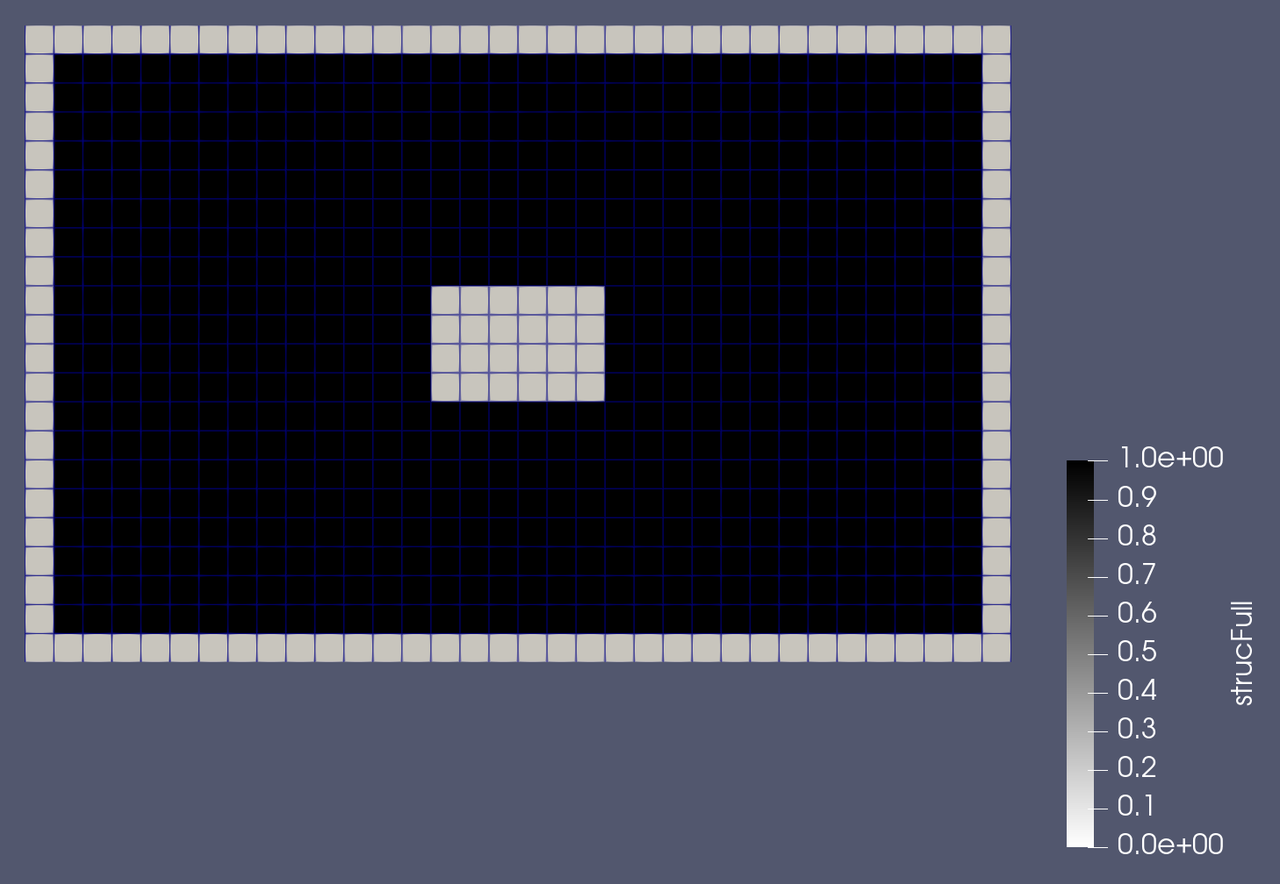

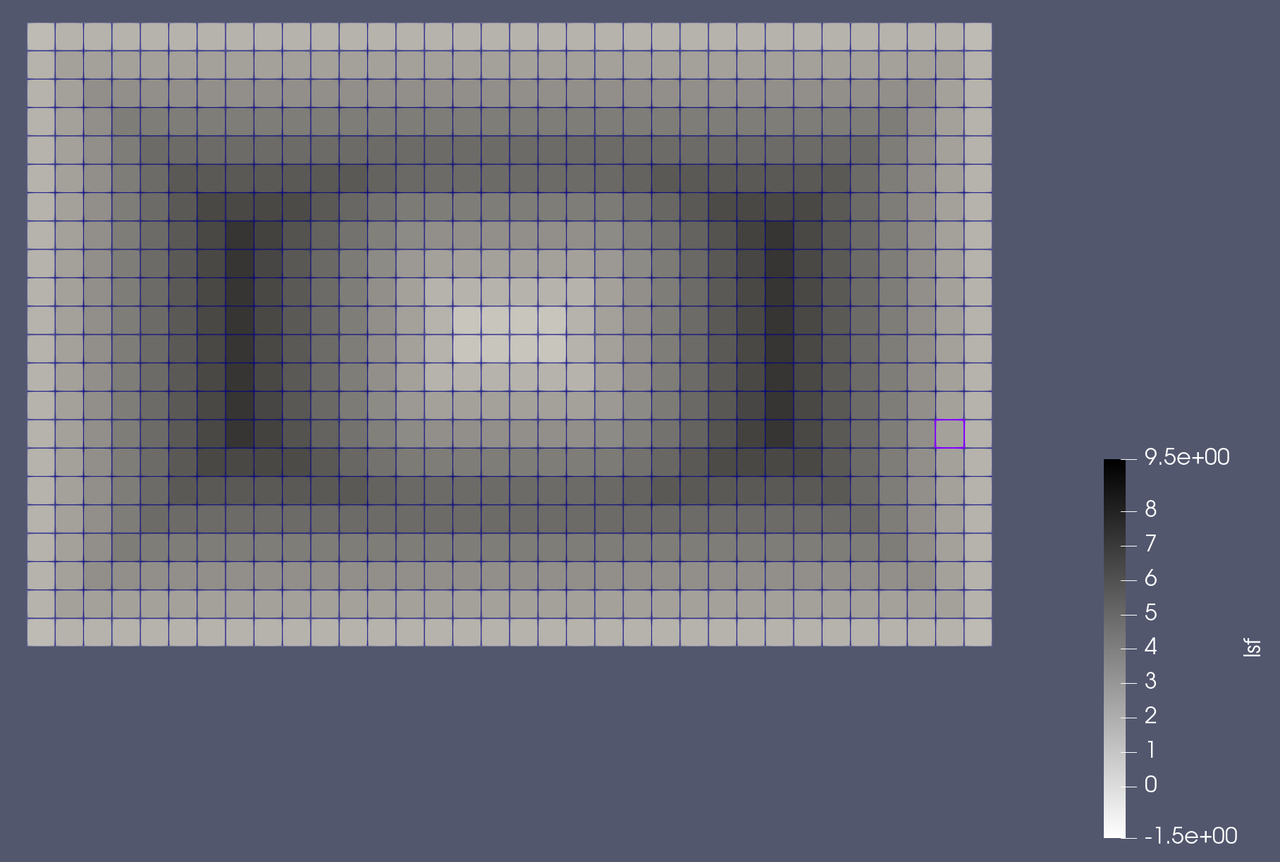

In [ ]:
# 创建一个测试用的结构数组（全实体）
struc = np.ones((nely, nelx))
strucFull = np.zeros((nely + 2, nelx + 2))
strucFull[1:-1, 1:-1] = struc
print("strucFull:", strucFull.shape, "\n", strucFull)

# 调用 reinit 函数
lsf = ls.reinit(struc)
print("lsf:", lsf.shape, "\n", lsf)

In [ ]:
# 可视化
from fealpy.mesh import UniformMesh2d
hx = (domain[1] - domain[0]) / nelx
hy = (domain[3] - domain[2]) / nely
mesh = UniformMesh2d(extent=(0, nelx+2, 0, nely+2), 
                    h=(hx, hy), origin=(domain[0], domain[2]))

fname = os.path.join(visualization_dir, 'strucFull_full.vtu')
mesh.to_vtk_file(filename=fname, 
                 celldata={'strucFull': strucFull.flatten('C')})

fname = os.path.join(visualization_dir, 'lsf_full.vtu')
mesh.to_vtk_file(filename=fname, 
                 celldata={'lsf': lsf.flatten('C')})

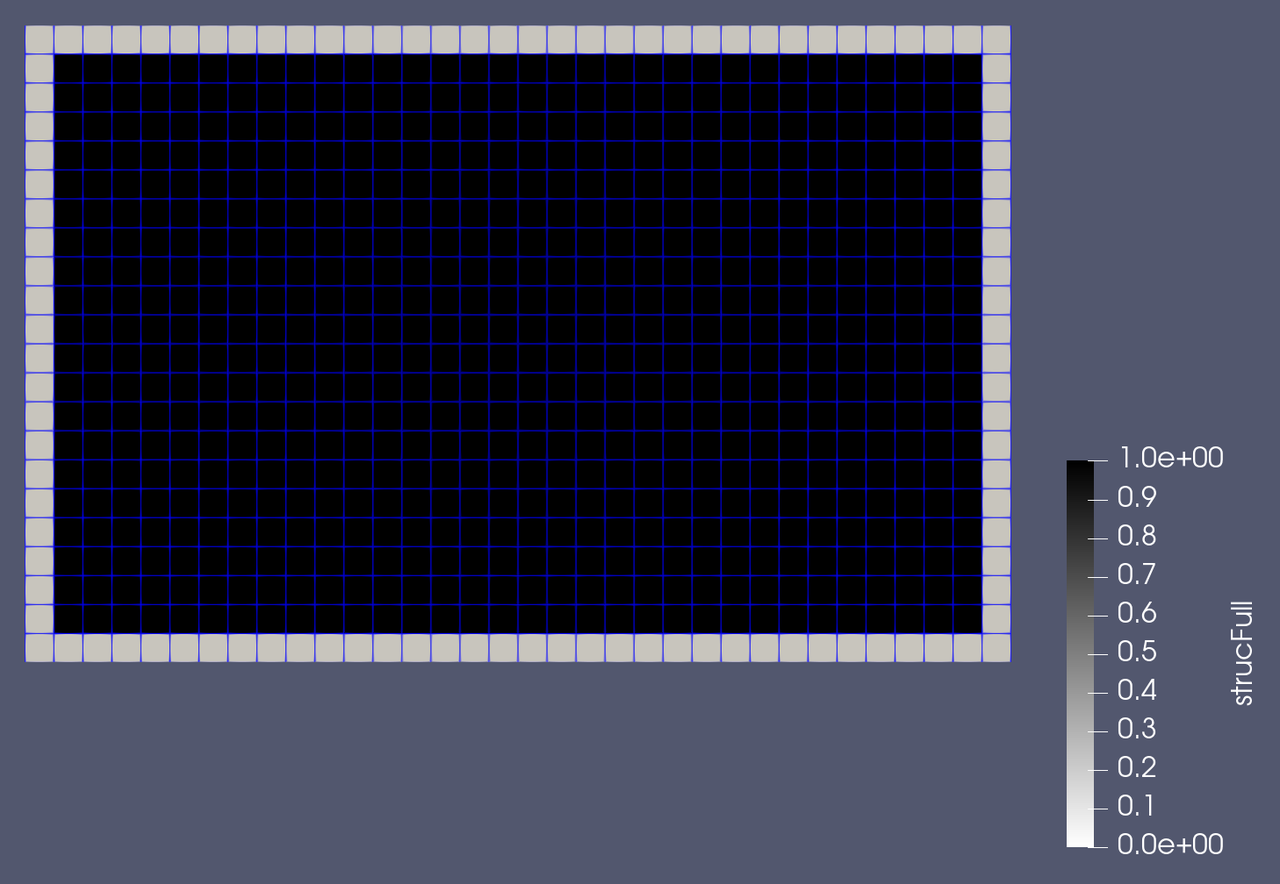

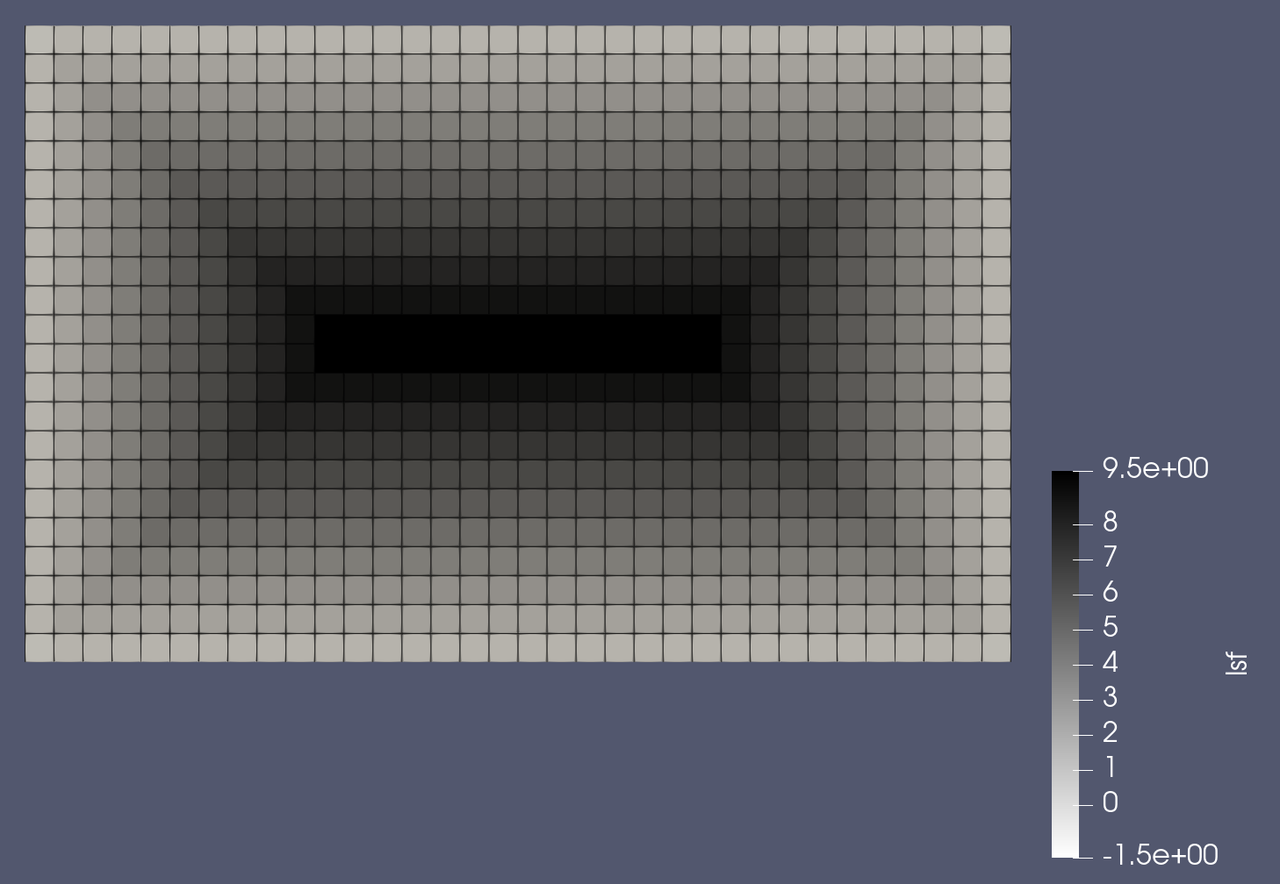